<a href="https://colab.research.google.com/github/vicky43142/Durgam-Vivek/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Data Cleaning, Analysis & Visualization

This Colab notebook performs end-to-end data cleaning and visualization for Netflix content data.

In [ ]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
# Step 2: Load Dataset
data = pd.read_csv('netflix1.csv')
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
# Step 3: Initial Overview
data.info()
print("Dataset shape:", data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
Dataset shape: (8790, 10)


In [ ]:
# Step 4: Clean Data
data = data.drop_duplicates()
data = data.dropna(subset=['director',  'country'])
data['date_added'] = pd.to_datetime(data['date_added'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


C:\Users\vivek\AppData\Local\Temp\ipykernel_21364\2047201252.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='type', palette='Set2')


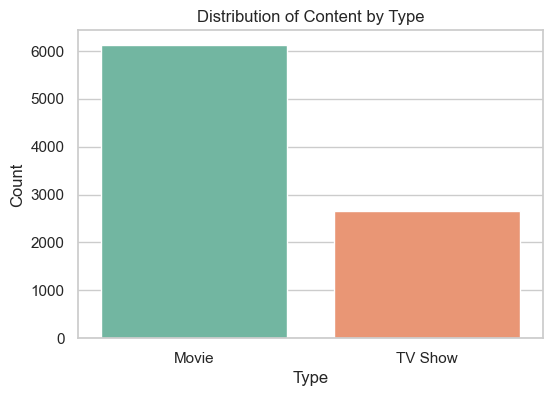

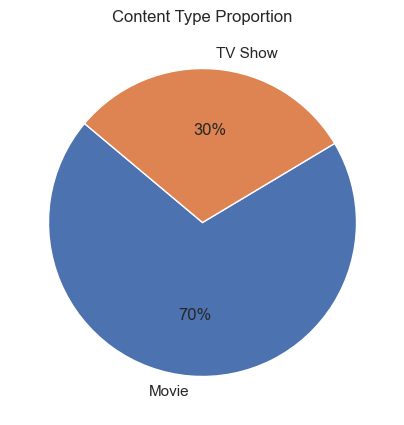

In [ ]:
# Step 5: Content Type Distribution
type_counts = data['type'].value_counts()

plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='type', palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(5, 5))
plt.pie(type_counts, labels=type_counts.index, autopct='%.0f%%', startangle=140)
plt.title('Content Type Proportion')
plt.show()

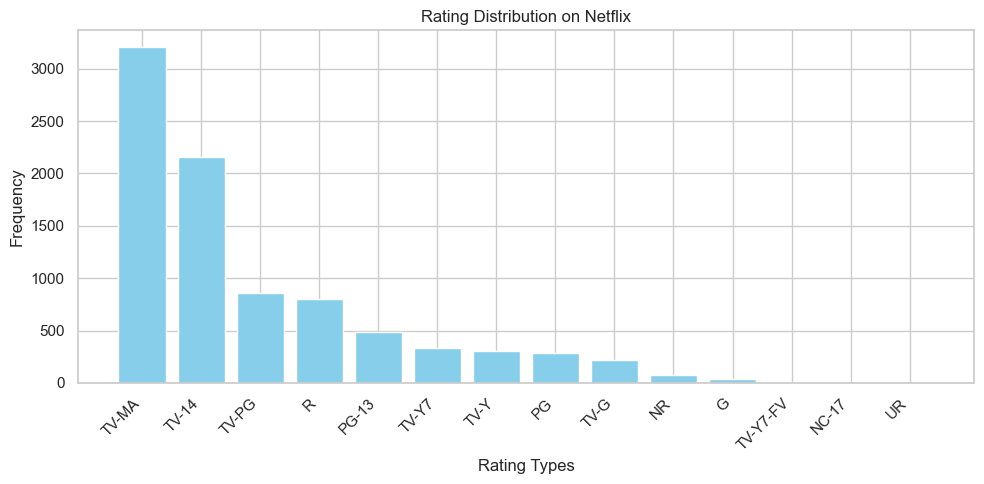

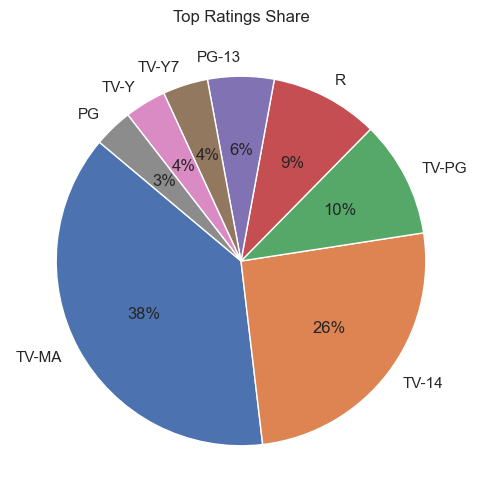

In [ ]:
# Step 6: Rating Distribution
ratings = data['rating'].value_counts().reset_index()
ratings.columns = ['rating', 'count']

plt.figure(figsize=(10, 5))
plt.bar(ratings['rating'], ratings['count'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Frequency")
plt.title('Rating Distribution on Netflix')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8], autopct='%.0f%%', startangle=140)
plt.title("Top Ratings Share")
plt.show()

C:\Users\vivek\AppData\Local\Temp\ipykernel_21364\2708814257.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


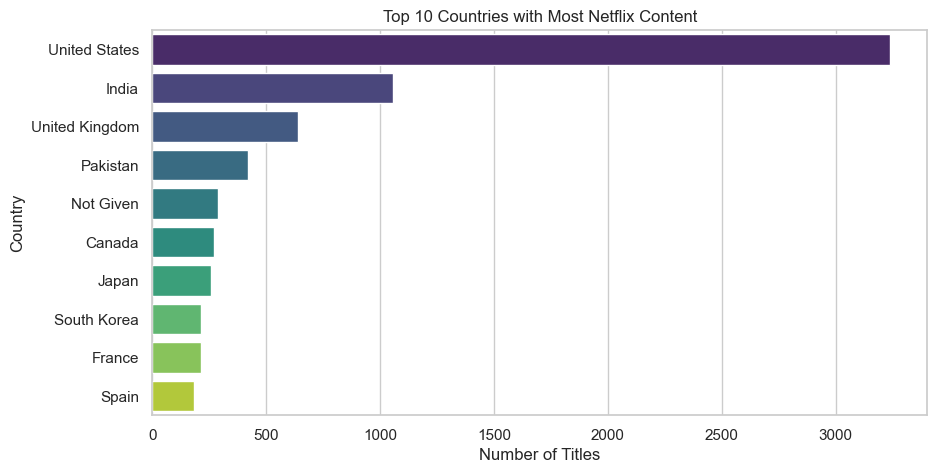

In [ ]:
# Step 7: Top Countries with Most Content
top_countries = data['country'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

In [ ]:
# Step 8: Date Parts
data['year'] = data['date_added'].dt.year
data['month'] = data['date_added'].dt.month
data['day'] = data['date_added'].dt.day

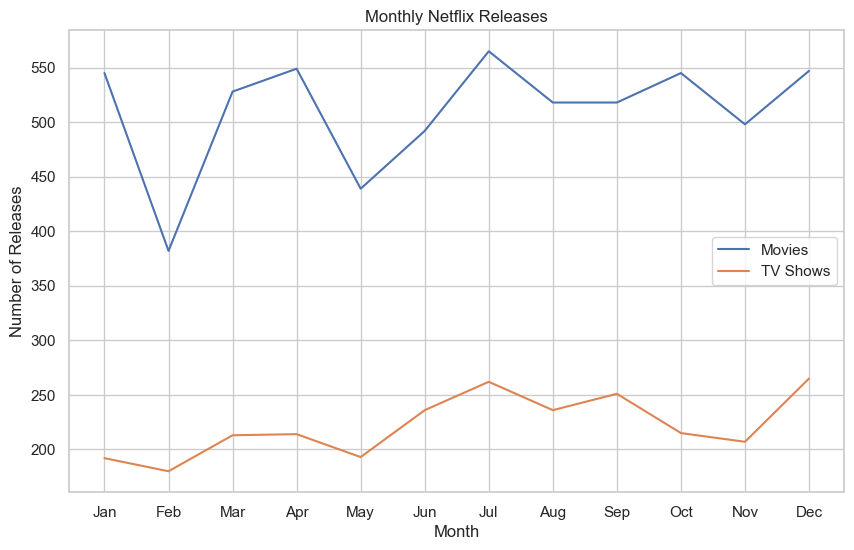

In [ ]:
# Step 9: Monthly Releases
monthly_movie = data[data['type'] == 'Movie']['month'].value_counts().sort_index()
monthly_tv = data[data['type'] == 'TV Show']['month'].value_counts().sort_index()

plt.plot(monthly_movie.index, monthly_movie.values, label='Movies')
plt.plot(monthly_tv.index, monthly_tv.values, label='TV Shows')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("Month")
plt.ylabel("Number of Releases")
plt.title("Monthly Netflix Releases")
plt.legend()
plt.grid(True)
plt.show()

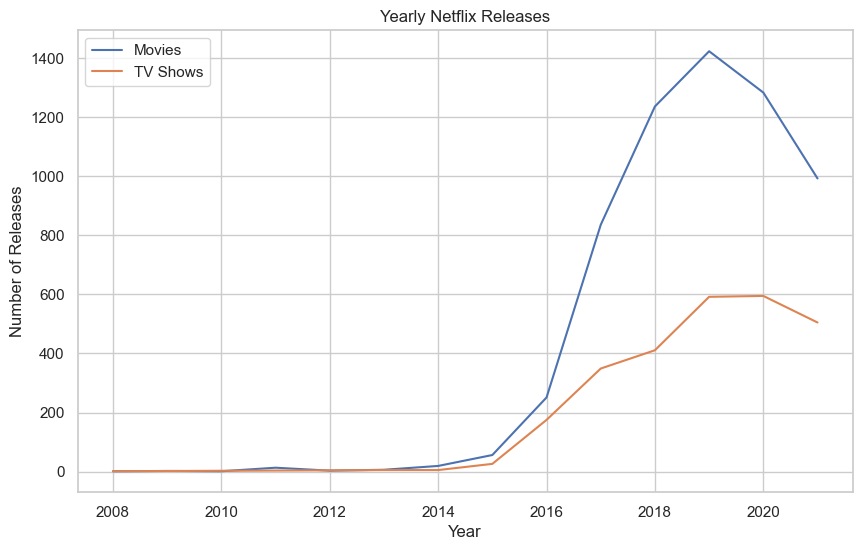

In [ ]:
# Step 10: Yearly Releases
yearly_movie = data[data['type'] == 'Movie']['year'].value_counts().sort_index()
yearly_tv = data[data['type'] == 'TV Show']['year'].value_counts().sort_index()

plt.plot(yearly_movie.index, yearly_movie.values, label='Movies')
plt.plot(yearly_tv.index, yearly_tv.values, label='TV Shows')
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.title("Yearly Netflix Releases")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\vivek\AppData\Local\Temp\ipykernel_21364\3045724881.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movie_genres.values, y=movie_genres.index, palette='pastel')


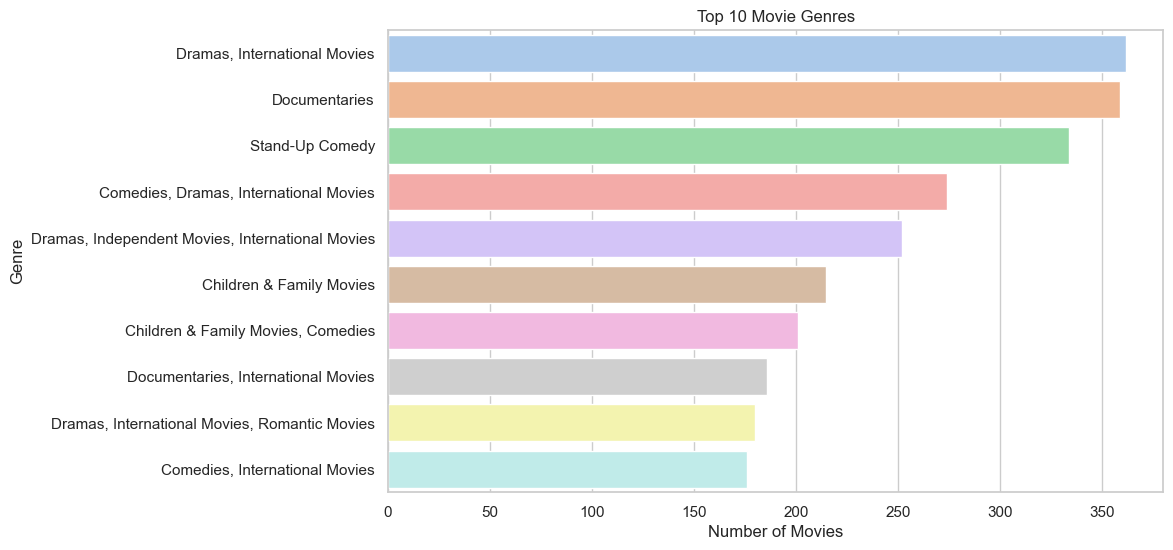

C:\Users\vivek\AppData\Local\Temp\ipykernel_21364\3045724881.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tv_genres.values, y=tv_genres.index, palette='mako')


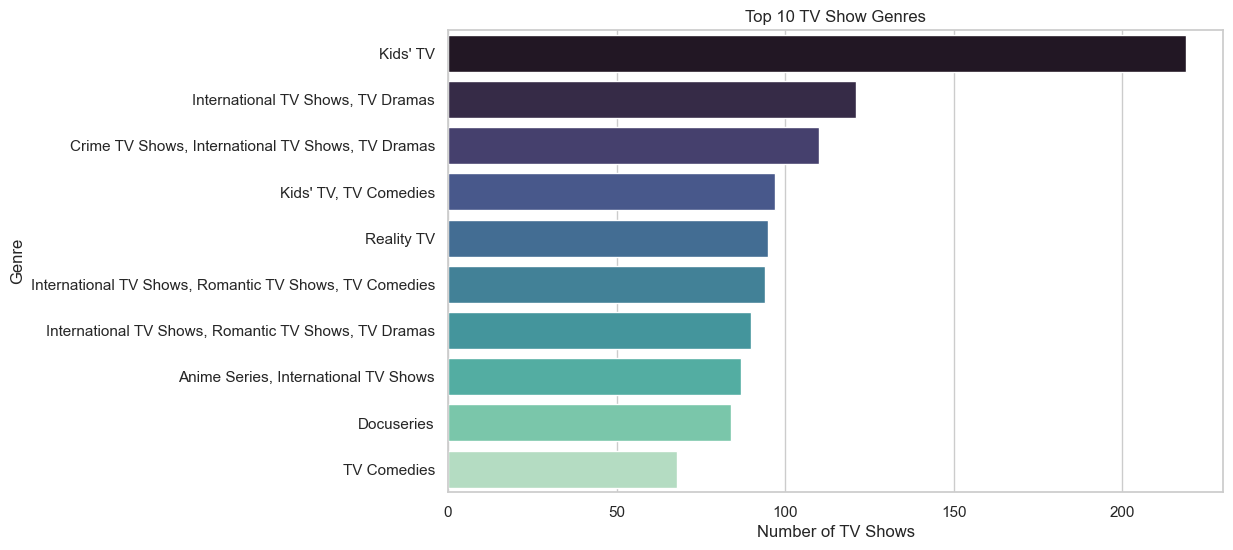

In [ ]:
# Step 11-12: Top Genres
movie_genres = data[data['type'] == 'Movie']['listed_in'].value_counts().head(10)
tv_genres = data[data['type'] == 'TV Show']['listed_in'].value_counts().head(10)

plt.figure()
sns.barplot(x=movie_genres.values, y=movie_genres.index, palette='pastel')
plt.title("Top 10 Movie Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

plt.figure()
sns.barplot(x=tv_genres.values, y=tv_genres.index, palette='mako')
plt.title("Top 10 TV Show Genres")
plt.xlabel("Number of TV Shows")
plt.ylabel("Genre")
plt.show()

C:\Users\vivek\AppData\Local\Temp\ipykernel_21364\3121349039.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='cubehelix')


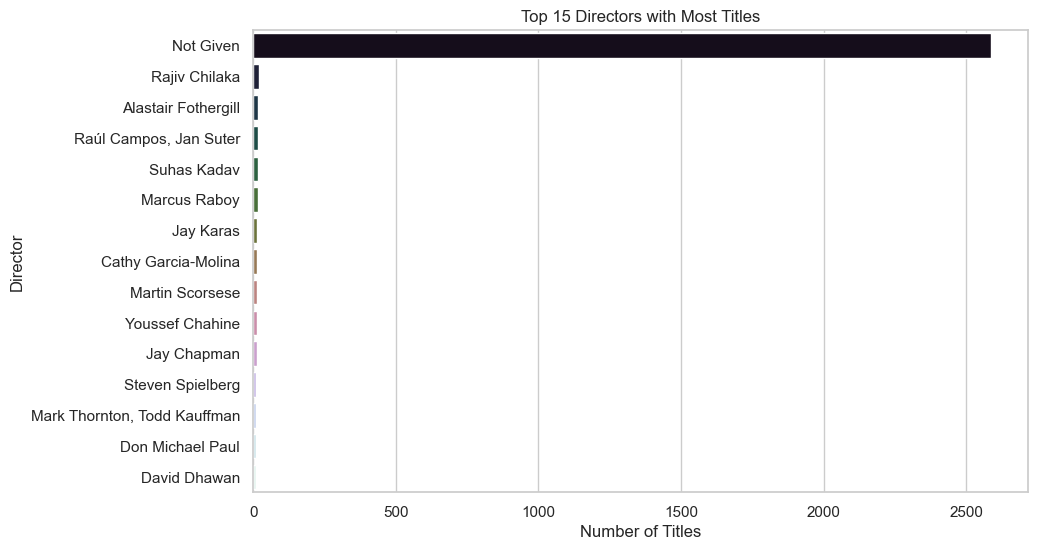

In [ ]:
# Step 13: Top Directors
top_directors = data['director'].value_counts().head(15)

plt.figure()
sns.barplot(x=top_directors.values, y=top_directors.index, palette='cubehelix')
plt.title("Top 15 Directors with Most Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

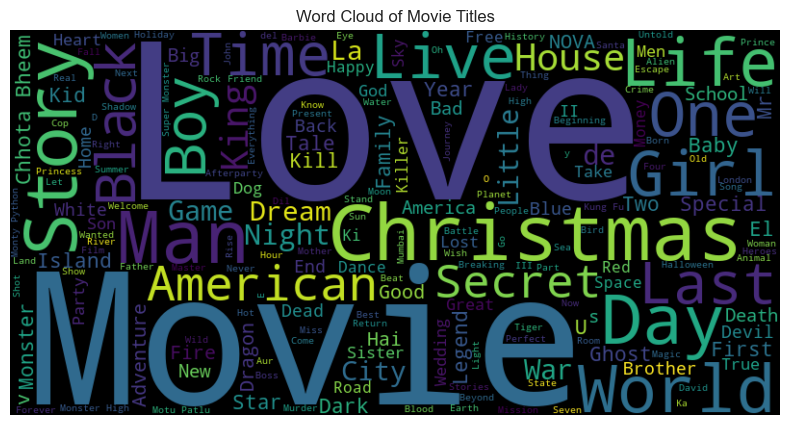

In [ ]:
# Step 14: Word Cloud
text = ' '.join(data[data['type'] == 'Movie']['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Movie Titles")
plt.show()